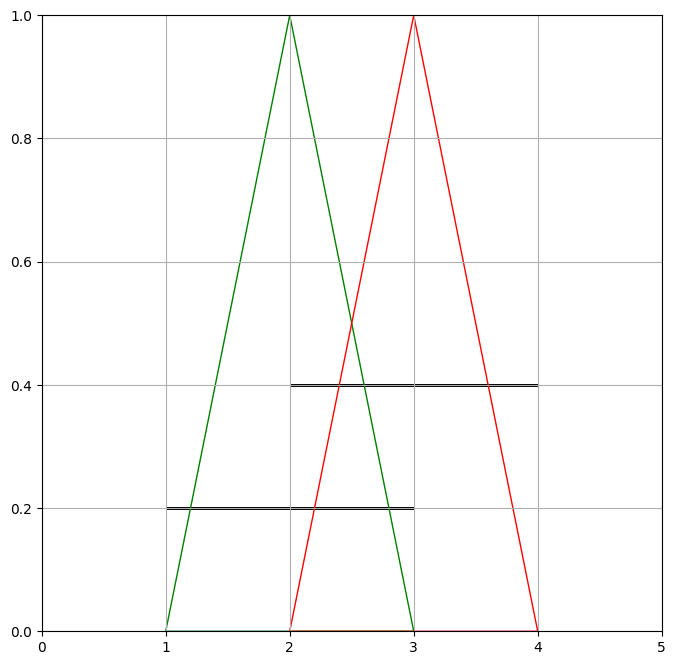

In [46]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

min_value = 0.2
max_value = 0.4

min_range = Polygon([[1, 0], [2, 1], [3, 0]],
                    edgecolor='green',
                    facecolor='none')
max_range = Polygon([[2, 0], [3, 1], [4, 0]],
                    edgecolor='red',
                    facecolor='none',
                    )

cut_min_line = Polygon([[1, min_value], [2, min_value], [3, min_value]],
                       edgecolor='black',
                       linewidth=2)

cut_max_line = Polygon([[2, max_value], [3, max_value], [4, max_value]],
                       edgecolor='black',
                       linewidth=2)

fig, ax = plt.subplots(figsize=(8, 8))

ax.add_patch(cut_min_line)
ax.add_patch(cut_max_line)
ax.add_patch(min_range)
ax.add_patch(max_range)

ax.set_xlim(0, 5)
ax.set_ylim(0, 1)


ax.grid(True)
plt.show()  # покажутся обе фигуры

# Алгоритм нахождения центра тяжести объединенной площади двух треугольников

## 1. Постановка задачи

Имеются два треугольника, расположенных на плоскости:
- **Треугольник A**: вершины (1,0), (2,1), (3,0)
- **Треугольник B**: вершины (2,0), (3,1), (4,0)

Треугольники пересекаются в области x ∈ [2,3]. Каждый треугольник срезается горизонтальной линией на заданной высоте:
- Первый треугольник срезается на высоте `min_value` (нижняя часть)
- Второй треугольник срезается на высоте `max_value` (нижняя часть)

**Требуется**: найти центр тяжести объединенной площади нижних частей обоих треугольников.

## 2. Математическая основа

### 2.1 Центр тяжести многоугольника

Для многоугольника с вершинами $(x_i, y_i)$, упорядоченными против часовой стрелки:

**Площадь** (формула Гаусса):
$$A = \frac{1}{2}\sum_{i=0}^{n-1}(x_i y_{i+1} - x_{i+1} y_i)$$

**Координаты центра тяжести**:
$$C_x = \frac{1}{6A}\sum_{i=0}^{n-1}(x_i + x_{i+1})(x_i y_{i+1} - x_{i+1} y_i)$$
$$C_y = \frac{1}{6A}\sum_{i=0}^{n-1}(y_i + y_{i+1})(x_i y_{i+1} - x_{i+1} y_i)$$

### 2.2 Объединение площадей

Центр тяжести объединенной фигуры вычисляется как средневзвешенное по площадям:
$$\vec{C}_{combined} = \frac{\sum_i A_i \vec{C}_i}{\sum_i A_i}$$

При пересечении фигур используется формула с вычитанием пересечения:
$$\vec{C} = \frac{A_1\vec{C_1} + A_2\vec{C_2} - A_{intersect}\vec{C_{intersect}}}{A_1 + A_2 - A_{intersect}}$$

## 3. Алгоритм работы


### 3.2 Этапы алгоритма

#### Этап 1: Разрезание треугольника

Для каждого треугольника:
1. Находим точки пересечения сторон с горизонтальной линией `y = h`
2. Для стороны (p₁,p₂) параметр `t = (h - y₁)/(y₂ - y₁)`, точка `x = x₁ + t(x₂ - x₁)`
3. Собираем все вершины с `y ≤ h` и точки пересечения
4. Сортируем точки по полярному углу для корректного многоугольника

#### Этап 2: Объединение нижних частей

1. Преобразуем нижние части в объекты `shapely.Polygon`
2. Объединяем их через `unary_union` (алгоритм Weiler-Atherton)
3. Получаем единый многоугольник, представляющий объединенную площадь

#### Этап 3: Вычисление центра тяжести

1. Используем `polygon.centroid` из библиотеки shapely
2. Метод возвращает точку с координатами (x, y)
3. Проверяем корректность: центр тяжести должен лежать внутри фигуры

#### Этап 4: Визуализация

1. Строим сетку в bounding box фигур
2. Создаем маску принадлежности точек объединенной области
3. Закрашиваем область (contourf)
4. Отмечаем центр тяжести красной точкой с аннотацией координат
5. Добавляем информацию о площади

## 4. Реализация

### 4.1 Ключевые функции

```python
def cut_triangle_at_height(triangle_points, cut_height):
    """
    Разрезает треугольник горизонтальной линией

    Args:
        triangle_points: list of 3 points [[x1,y1], [x2,y2], [x3,y3]]
        cut_height: float - высота разреза

    Returns:
        list - точки нижней части многоугольника
    """
    # Нахождение точек пересечения
    # Формирование результирующего многоугольника
    # Сортировка точек
    return bottom_points

def calculate_combined_centroid(triangles_data):
    """
    Вычисляет центр тяжести объединенной площади

    Args:
        triangles_data: list of polygons (each is list of points)

    Returns:
        tuple: ([x, y], combined_polygon) or (None, None)
    """
    # Создание shapely полигонов
    polygons = [ShapelyPolygon(p) for p in triangles_data if len(p) >= 3]

    # Объединение
    combined = unary_union(polygons)

    # Получение центроида
    centroid = combined.centroid
    return [centroid.x, centroid.y], combined


График 1: Первый треугольник


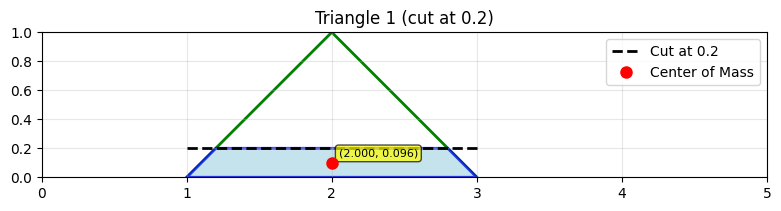

График 2: Второй треугольник


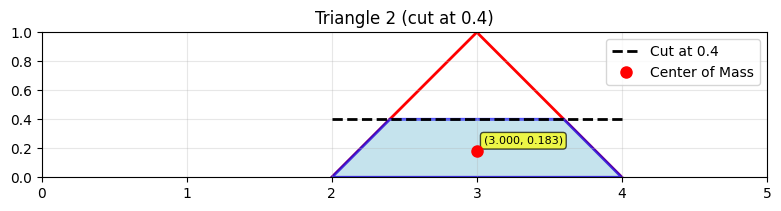

График 3: Объединенная площадь с центром тяжести


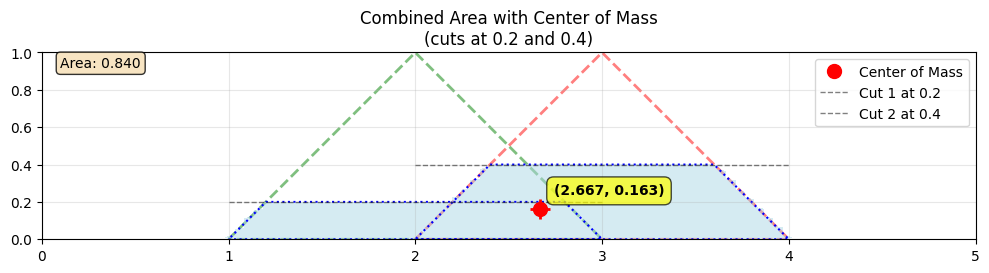

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon, PathPatch
from matplotlib.path import Path
from shapely.geometry import Polygon as ShapelyPolygon
from shapely.ops import unary_union

def create_triangle(base_points):
    """Создает треугольник по трем точкам"""
    return Polygon(base_points, edgecolor='black', facecolor='none', linewidth=1)

def cut_triangle_at_height(triangle_points, cut_height):
    """
    Разрезает треугольник горизонтальной линией на уровне cut_height
    и возвращает нижнюю часть
    """
    # Сортируем точки по y для определения положения относительно линии разреза
    points = np.array(triangle_points)

    # Находим точки, где линия пересекает стороны треугольника
    intersection_points = []

    # Проверяем каждую сторону треугольника
    for i in range(3):
        p1 = points[i]
        p2 = points[(i + 1) % 3]

        # Проверяем, пересекает ли линия эту сторону
        if (p1[1] <= cut_height <= p2[1]) or (p2[1] <= cut_height <= p1[1]):
            if p1[1] != p2[1]:  # Избегаем деления на ноль
                t = (cut_height - p1[1]) / (p2[1] - p1[1])
                if 0 <= t <= 1:
                    x = p1[0] + t * (p2[0] - p1[0])
                    intersection_points.append([x, cut_height])

    # Собираем все точки нижней части (y <= cut_height)
    bottom_points = []

    # Добавляем исходные точки ниже линии разреза
    for point in points:
        if point[1] <= cut_height:
            bottom_points.append(point.tolist())

    # Добавляем точки пересечения
    for point in intersection_points:
        if point not in bottom_points:
            bottom_points.append(point)

    # Сортируем точки для создания корректного многоугольника
    if len(bottom_points) >= 3:
        # Сортируем по углу относительно центра
        center = np.mean(bottom_points, axis=0)
        bottom_points.sort(key=lambda p: np.arctan2(p[1] - center[1], p[0] - center[0]))

    return bottom_points

def calculate_centroid(polygon_points):
    """
    Вычисляет центр тяжести (центроид) многоугольника
    """
    if len(polygon_points) < 3:
        return None

    # Используем shapely для точного вычисления центроида
    polygon = ShapelyPolygon(polygon_points)

    if polygon.is_valid and not polygon.is_empty:
        centroid = polygon.centroid
        return [centroid.x, centroid.y]

    return None

def calculate_combined_centroid(triangles_data):
    """
    Вычисляет центр тяжести объединенной площади нескольких многоугольников
    """
    # Создаем список полигонов Shapely
    polygons = []

    for points in triangles_data:
        if len(points) >= 3:
            polygon = ShapelyPolygon(points)
            if polygon.is_valid and not polygon.is_empty:
                polygons.append(polygon)

    if not polygons:
        return None

    # Объединяем все полигоны
    combined = unary_union(polygons)

    if combined.is_empty:
        return None

    # Получаем центроид объединенной области
    centroid = combined.centroid

    return [centroid.x, centroid.y], combined

def plot_combined_area(ax, triangles_data):
    """
    Рисует объединенную площадь всех треугольников и отмечает центр тяжести
    """
    # Создаем сетку для определения области
    x = np.linspace(0, 5, 100)
    y = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(x, y)

    # Создаем маску для объединенной области
    combined_mask = np.zeros_like(X, dtype=bool)

    for points in triangles_data:
        if len(points) >= 3:
            # Создаем маску для текущего треугольника
            path = Path(points)
            mask = path.contains_points(np.column_stack((X.flatten(), Y.flatten())))
            mask = mask.reshape(X.shape)
            combined_mask = combined_mask | mask

    # Закрашиваем объединенную область
    if np.any(combined_mask):
        ax.contourf(X, Y, combined_mask, levels=[0.5, 1.5], colors=['lightblue'], alpha=0.5)

        # Вычисляем и отображаем центр тяжести
        centroid_result = calculate_combined_centroid(triangles_data)

        if centroid_result:
            centroid, combined_polygon = centroid_result

            # Отмечаем центр тяжести
            ax.plot(centroid[0], centroid[1], 'ro', markersize=10, label='Center of Mass', zorder=5)
            ax.plot(centroid[0], centroid[1], 'r+', markersize=15, markeredgewidth=2, zorder=6)

            # Добавляем аннотацию с координатами
            ax.annotate(f'({centroid[0]:.3f}, {centroid[1]:.3f})',
                       (centroid[0], centroid[1]),
                       xytext=(10, 10), textcoords='offset points',
                       bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                       fontsize=10, weight='bold')

            # Добавляем информацию о площади
            area = combined_polygon.area
            ax.text(0.02, 0.98, f'Area: {area:.3f}',
                   transform=ax.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

def plot_first_triangle(min_value=0.2):
    """Создает первый график с первым треугольником"""
    fig, ax = plt.subplots(figsize=(8, 6))

    # Определяем первый треугольник
    triangle1_points = [[1, 0], [2, 1], [3, 0]]

    # Рисуем исходный треугольник
    triangle = Polygon(triangle1_points, edgecolor='green', facecolor='none', linewidth=2)
    ax.add_patch(triangle)

    # Рисуем линию разреза
    ax.plot([1, 2, 3], [min_value] * 3, 'k--', linewidth=2, label=f'Cut at {min_value}')

    # Получаем и рисуем нижнюю часть
    bottom_points = cut_triangle_at_height(triangle1_points, min_value)

    if len(bottom_points) >= 3:
        bottom_part = Polygon(bottom_points,
                            edgecolor='blue',
                            facecolor='lightblue',
                            alpha=0.7,
                            linewidth=2)
        ax.add_patch(bottom_part)

        # Вычисляем и отображаем центр тяжести нижней части
        centroid = calculate_centroid(bottom_points)
        if centroid:
            ax.plot(centroid[0], centroid[1], 'ro', markersize=8, label='Center of Mass', zorder=5)
            ax.annotate(f'({centroid[0]:.3f}, {centroid[1]:.3f})',
                       (centroid[0], centroid[1]),
                       xytext=(5, 5), textcoords='offset points',
                       fontsize=8, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

    # Настройка осей
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(f'Triangle 1 (cut at {min_value})')
    ax.legend()

    plt.tight_layout()
    plt.show()

def plot_second_triangle(max_value=0.4):
    """Создает второй график со вторым треугольником"""
    fig, ax = plt.subplots(figsize=(8, 6))

    # Определяем второй треугольник
    triangle2_points = [[2, 0], [3, 1], [4, 0]]

    # Рисуем исходный треугольник
    triangle = Polygon(triangle2_points, edgecolor='red', facecolor='none', linewidth=2)
    ax.add_patch(triangle)

    # Рисуем линию разреза
    ax.plot([2, 3, 4], [max_value] * 3, 'k--', linewidth=2, label=f'Cut at {max_value}')

    # Получаем и рисуем нижнюю часть
    bottom_points = cut_triangle_at_height(triangle2_points, max_value)

    if len(bottom_points) >= 3:
        bottom_part = Polygon(bottom_points,
                            edgecolor='blue',
                            facecolor='lightblue',
                            alpha=0.7,
                            linewidth=2)
        ax.add_patch(bottom_part)

        # Вычисляем и отображаем центр тяжести нижней части
        centroid = calculate_centroid(bottom_points)
        if centroid:
            ax.plot(centroid[0], centroid[1], 'ro', markersize=8, label='Center of Mass', zorder=5)
            ax.annotate(f'({centroid[0]:.3f}, {centroid[1]:.3f})',
                       (centroid[0], centroid[1]),
                       xytext=(5, 5), textcoords='offset points',
                       fontsize=8, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

    # Настройка осей
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(f'Triangle 2 (cut at {max_value})')
    ax.legend()

    plt.tight_layout()
    plt.show()

def plot_combined_triangles(min_value=0.2, max_value=0.4):
    """Создает третий график с объединенной площадью и центром тяжести"""
    fig, ax = plt.subplots(figsize=(10, 8))

    # Определяем треугольники
    triangle1_points = [[1, 0], [2, 1], [3, 0]]
    triangle2_points = [[2, 0], [3, 1], [4, 0]]

    # Получаем нижние части после разрезов
    bottom1 = cut_triangle_at_height(triangle1_points, min_value)
    bottom2 = cut_triangle_at_height(triangle2_points, max_value)

    # Рисуем исходные треугольники пунктиром (для контекста)
    triangle1 = Polygon(triangle1_points, edgecolor='green', facecolor='none', linewidth=2, linestyle='--', alpha=0.5)
    triangle2 = Polygon(triangle2_points, edgecolor='red', facecolor='none', linewidth=2, linestyle='--', alpha=0.5)
    ax.add_patch(triangle1)
    ax.add_patch(triangle2)

    # Рисуем объединенную площадь нижних частей с центром тяжести
    plot_combined_area(ax, [bottom1, bottom2])

    # Добавляем контуры нижних частей для наглядности
    if len(bottom1) >= 3:
        bottom1_poly = Polygon(bottom1, edgecolor='blue', facecolor='none', linewidth=1.5, linestyle=':')
        ax.add_patch(bottom1_poly)

    if len(bottom2) >= 3:
        bottom2_poly = Polygon(bottom2, edgecolor='blue', facecolor='none', linewidth=1.5, linestyle=':')
        ax.add_patch(bottom2_poly)

    # Добавляем линии разреза
    ax.plot([1, 2, 3], [min_value] * 3, 'k--', alpha=0.5, linewidth=1, label=f'Cut 1 at {min_value}')
    ax.plot([2, 3, 4], [max_value] * 3, 'k--', alpha=0.5, linewidth=1, label=f'Cut 2 at {max_value}')

    # Настройка осей
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(f'Combined Area with Center of Mass\n(cuts at {min_value} and {max_value})')
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

def main(min_value=0.2, max_value=0.4):
    """
    Основная функция, которая последовательно показывает три графика
    """
    print("График 1: Первый треугольник")
    plot_first_triangle(min_value)

    print("График 2: Второй треугольник")
    plot_second_triangle(max_value)

    print("График 3: Объединенная площадь с центром тяжести")
    plot_combined_triangles(min_value, max_value)

# Пример использования
if __name__ == "__main__":
    # Можно менять параметры
    main(min_value=0.2, max_value=0.4)

    # Или вызвать с другими значениями:
    # main(min_value=0.3, max_value=0.6)